In [67]:
def evaluate(model, X, y, nsplit, model_name, constant_value=None):
    ''' Evaluates the performance of a model 
    Args:
        model (sklearn.Estimator): fitted sklearn estimator
        X (np.array): predictors
        y (np.array): true outcome
        nsplit (str): name of the split
        model_name (str): string id of the model
        constant_value (int or None): relevant if the model predicts a constant
    '''
    if constant_value is not None:
        preds = np.array([constant_value] * y.shape[0])
    else:
        preds = model.predict(X)
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import pickle as pkl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
performances = []
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [69]:
# loading dataset and have information about it
data = pd.read_csv("/Users/sylvainestebe/Code/DataSci-AU-24-1/data/bikes.csv")
data.info()
# data.describe() if needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [70]:
# removing categorical variable
X = data.drop("dteday", axis=1)
# target
y = data["cnt"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [72]:
# save the split
X =[X_train, X_val, X_test]
y = [y_train, y_val, y_test]
name = ['train', 'val', 'test']
for x,y,name in zip(X,y,name):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = data.columns
    df.to_csv(f'/Users/sylvainestebe/Code/DataSci-AU-24-1/data/{name}.csv')

# Model 0


In [73]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    evaluate(model=None, 
             X=x, y=y, 
             nsplit=nsplit, 
             model_name='dummy', 
             constant_value=y_train.mean())

# Model 1

In [74]:
linear_regressor = LinearRegression(fit_intercept = True)
reg = linear_regressor.fit(X_train[:,12].reshape(-1,1),y_train.reshape(-1,1))


In [75]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                      [y_train, y_val, y_test],
                      ['train', 'val', 'test']):
    evaluate(model=reg, 
             X=x[:,12].reshape(-1,1), y=y, 
             nsplit=nsplit, 
             model_name='linear-model-dem')

In [76]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 183.5925, 'r2': 0.0},
 {'model': 'dummy', 'split': 'val', 'rmse': 174.2015, 'r2': -0.001},
 {'model': 'dummy', 'split': 'test', 'rmse': 178.0718, 'r2': -0.0012},
 {'model': 'linear-model-dem',
  'split': 'train',
  'rmse': 182.8434,
  'r2': 0.0081},
 {'model': 'linear-model-dem', 'split': 'val', 'rmse': 173.5131, 'r2': 0.0069},
 {'model': 'linear-model-dem',
  'split': 'test',
  'rmse': 176.9843,
  'r2': 0.0109}]

# Model (all predictor)

In [79]:
linear_regressor = LinearRegression(fit_intercept = True)
reg = linear_regressor.fit(X_train[:,:16],y_train.reshape(-1,1))


In [80]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    evaluate(model=reg, 
                X=x, y=y, 
                nsplit=nsplit, 
                model_name=f'linear-full')

In [81]:
perf_df = pd.DataFrame(performances)

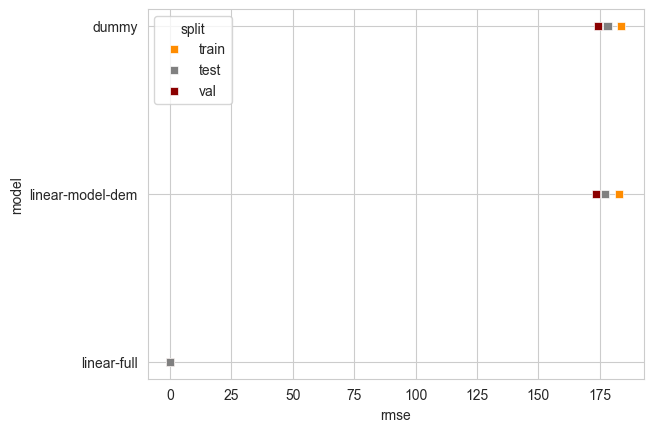

In [82]:
sns.set_style('whitegrid')
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

In [84]:
models = {} # storing fitted models in the next chunk
models['linear-0.0'] = reg

In [87]:
for alpha in [0.01, 0.1, 0.2, 0.5, 1.0, 20.0, 10.0, 100.0, 1000.0]:
    for est in [Lasso, Ridge]:
        if est == Lasso:
            id = 'lasso'
        else:
            id = 'ridge'
        reg = est(alpha=alpha).fit(X_train, y_train)
        models[f'{id}-{alpha}'] = reg
        for x,y,nsplit in zip([X_train, X_val, X_test],
                            [y_train, y_val, y_test],
                            ['train', 'val', 'test']):
            evaluate(model=reg, 
                    X=x, y=y, 
                    nsplit=nsplit, 
                    model_name=f'linear-{id}-alpha-{alpha}')

/Users/sylvainestebe/Code/DataSci-AU-24-1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+04, tolerance: 4.100e+04
  model = cd_fast.enet_coordinate_descent(
/Users/sylvainestebe/Code/DataSci-AU-24-1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.014e+04, tolerance: 4.100e+04
  model = cd_fast.enet_coordinate_descent(
/Users/sylvainestebe/Code/DataSci-AU-24-1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, c

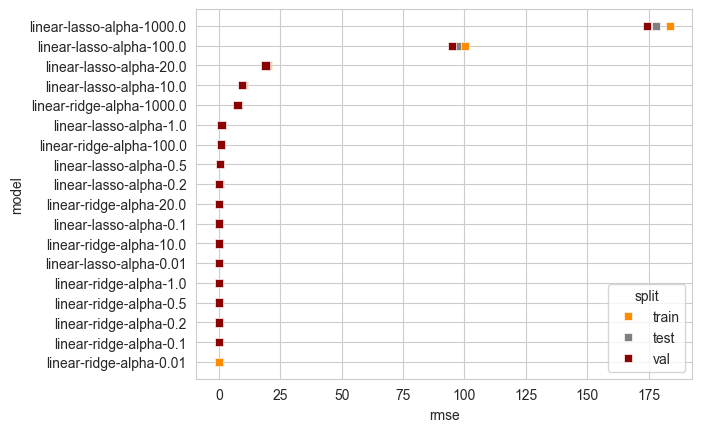

In [88]:
perf_df = pd.DataFrame(performances)
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

In [90]:
coefs = pd.DataFrame(np.vstack([v.coef_.round(4) for v in models.values()]),
                     columns=data.iloc[:,:16].columns)
coefs['mtype'] = [k.split('-')[0] for k in models.keys()]
coefs['alpha'] = [float(k.split('-')[1]) for k in models.keys()]
coefs = pd.melt(coefs, id_vars=['mtype', 'alpha'])# turning data into long format 

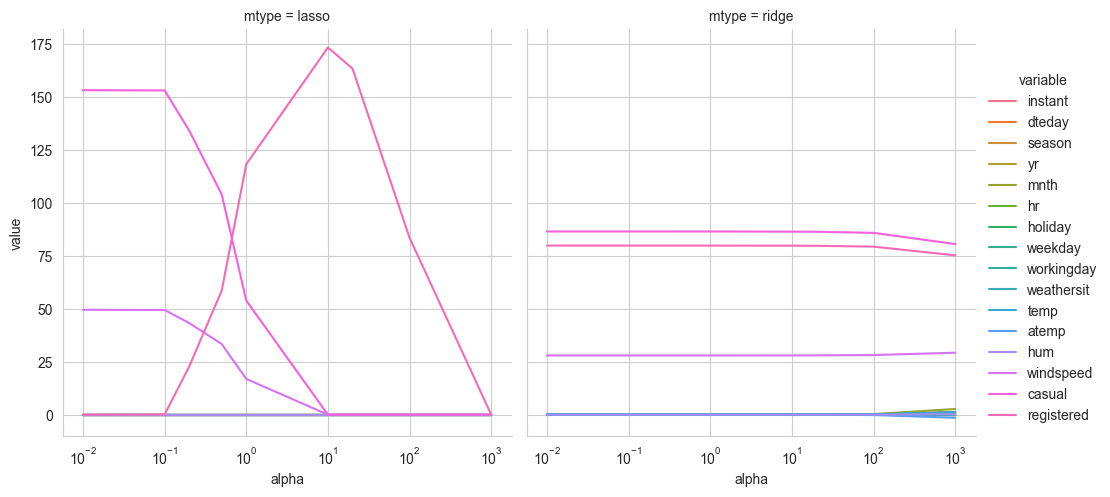

In [91]:
grid = sns.relplot(data=coefs[coefs['mtype']!='linear'], 
                   x='alpha', y='value', 
                   hue='variable', col='mtype', kind='line')
grid.set(xscale="log")

In [92]:
perf_df[perf_df['split']=='test'].sort_values(by='rmse', ascending=True)

,model,split,rmse,r2
5,linear-ridge-alpha-0.01,test,0.0001,1.0000
11,linear-ridge-alpha-0.1,test,0.0009,1.0000
17,linear-ridge-alpha-0.2,test,0.0017,1.0000
23,linear-ridge-alpha-0.5,test,0.0043,1.0000
29,linear-ridge-alpha-1.0,test,0.0085,1.0000
2,linear-lasso-alpha-0.01,test,0.0136,1.0000
41,linear-ridge-alpha-10.0,test,0.0850,1.0000
8,linear-lasso-alpha-0.1,test,0.1051,1.0000
35,linear-ridge-alpha-20.0,test,0.1699,1.0000
14,linear-lasso-alpha-0.2,test,0.2093,1.0000


ValueError: All arrays must be of the same length

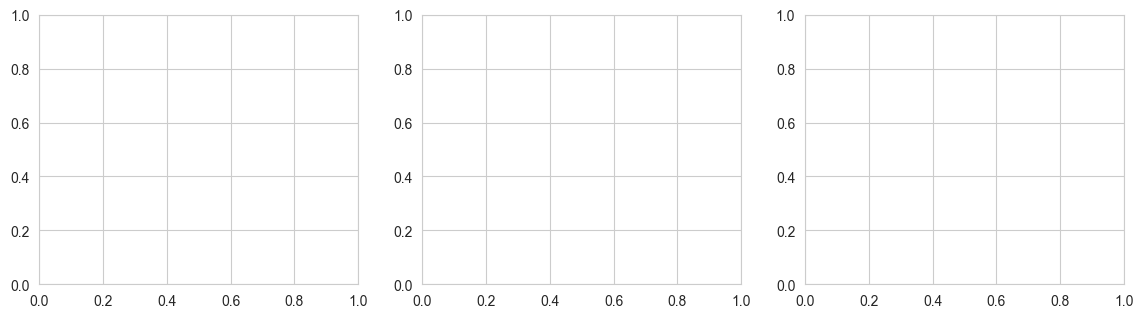

In [102]:
fig, ax = plt.subplots(ncols=3, figsize=(14,3.5))
sns.barplot(x=data.iloc[:,:16].columns, y=models['lasso-1.0'].coef_, ax=ax[2], color=sns.color_palette()[0])
sns.barplot(x=data.iloc[:,:16].columns, y=models['ridge-100.0'].coef_, ax=ax[1], color=sns.color_palette()[0])
sns.barplot(x=data.iloc[:,:16].columns, y=models['linear-0.0'].coef_, ax=ax[0], color=sns.color_palette()[0])
for a in ax:
    a.set_ylim(-50,50)
ax[2].set_title('Lasso, $\\alpha$ = 1.0')
ax[1].set_title('Ridge, $\\alpha$ = 100.0')
ax[0].set_title('Linear (no regularization)')
plt.show()
